<h1><center>Data Analysis Report</center></h1>
<h3><center>Uber Drives Dataset</center></h3>

## Introduction

In this notebook, we will discover various insights from **Uber Drives Dataset** and you can find the dataset <a href = "https://www.kaggle.com/zusmani/uberdrives">here</a>.To do that, we will part ways with **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** and work with one more visualization library, namely **Folium**. What is nice about **Folium** is that it was developed for the sole purpose of visualizing geospatial data. While other libraries are available to visualize geospatial data, such as **plotly**, they might have a cap on how many API calls you can make within a defined time frame. **Folium**, on the other hand, is completely free. Also, we will take help of libraries like **wordcloud** for creating word clouds with textual data, **geopy** for geocoding the locations.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Importing neccessary libraries](#0)<br>
2.  [Exploring Datasets with pandas](#1)<br>
3.  [Extracting date and time features](#2)<br>
4.  [Plotting Maps with matplotlib and seaborn](#3) <br>
5.  [Word Clouds](#4) <br>
6.  [Preparing data for geocoding](#5)<br>
7.  [Geo Maps](#6)<br>
8.  [Time series data](#7)<br>
9.  [Final Takeouts](#8)<br>
    </div>


# Importing neccessary libraries<a id="0"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
from geopy import Nominatim

plt.style.use('fivethirtyeight')
#plt.style.available

# Exploring Datasets with pandas<a id="1"></a>

**Importing the dataset**

In [2]:
uber = pd.read_csv(r'C:\Users\abc\Desktop\shivani-data\Documents\Downloads\uber.csv')
uber.head()

START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit

**Changing the name of the columns.**

In [3]:
uber.columns = ['start_date','end_date','category','start_loc','stop_loc','miles','purpose']

**Creating a function to make a dataframe for <br> representing null values.**

In [4]:
def null_values(data):
    null_val = data.isna().sum()
    nulls = data.isna().sum()/len(data)*100
    cols = data.columns
    nulls_data = pd.DataFrame({'Columns':cols,'Null_values':null_val,'Null_percent':nulls})
    nulls_data.set_index('Columns')
    nulls_data.drop('Columns',axis=1,inplace=True)
    nulls_data = nulls_data.sort_values('Null_percent',ascending=False)
    return nulls_data

In [5]:
null_values(uber)

Null_values  Null_percent
purpose             503     43.512111
end_date              1      0.086505
category              1      0.086505
start_loc             1      0.086505
stop_loc              1      0.086505
start_date            0      0.000000
miles                 0      0.000000

# Extracting date and time features<a id="2"></a>

Dropping the rows for object type in *start_date* column.

In [6]:
uber.drop(uber[uber['start_date']=='Totals'].index,inplace=True)

Extracting start and end date from *start_date* and *end_date* column respectively.

In [7]:
end_date = []
start_date = []
for x in uber['start_date']:
    start_date.append(x.split()[0])
for x in uber['end_date']:
    end_date.append(x.split()[0])

Converting the data type of *start_date* and *end_date* columns to datetime.

In [8]:
parse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
for dates in ['start_date','end_date']:
    uber[dates] = uber[dates].apply(parse)

Creating two separating columns which contains only <br> **start date**, **end date** and converting the datatypes as well.

In [9]:
uber['start_date_'] = start_date
uber['end_date_'] = end_date
uber['start_date_'] = pd.to_datetime(uber['start_date_'])
uber['end_date_'] = pd.to_datetime(uber['end_date_'])

In [10]:
uber.dtypes

start_date     datetime64[ns]
end_date       datetime64[ns]
category               object
start_loc              object
stop_loc               object
miles                 float64
purpose                object
start_date_    datetime64[ns]
end_date_      datetime64[ns]
dtype: object

Extracting the following features from the dates column:
* Duration of the ride in seconds.
* Day 
* Month
* Week

In [11]:
uber['duration'] = (uber['end_date'] - uber['start_date'])
uber['duration'] = uber['duration'].dt.total_seconds()/60
uber['day_name'] = uber['start_date'].dt.day_name()
uber['month'] = uber['start_date'].dt.strftime('%B')
uber['week'] = uber['start_date'].dt.week

In [12]:
uber.dtypes

start_date     datetime64[ns]
end_date       datetime64[ns]
category               object
start_loc              object
stop_loc               object
miles                 float64
purpose                object
start_date_    datetime64[ns]
end_date_      datetime64[ns]
duration              float64
day_name               object
month                  object
week                    int64
dtype: object

**Pivot table** is used to group variables and by default it returns the mean value for the numerical columns.<br>
The following pivot table shows a data frame with index as **purpose** with mean value of duration and miles in columns.

In [13]:
purpose_uber = uber.pivot_table(index = 'purpose', 
                                values=['miles','duration']).sort_values(by='duration',ascending=False)
purpose_uber

duration       miles
purpose                                
Commute          185.000000  180.200000
Customer Visit    33.415842   20.688119
Meeting           29.737968   15.247594
Charity ($)       27.000000   15.100000
Airport/Travel    26.000000    5.500000
Temporary Site    25.860000   10.474000
Between Offices   25.500000   10.944444
Meal/Entertain    16.125000    5.698125
Moving            15.000000    4.550000
Errand/Supplies   12.976562    3.968750

In [14]:
uber.pivot_table(index = 'purpose', 
                                values=['miles','duration'],
                               aggfunc = ['mean','count'])

mean                count      
                   duration       miles duration miles
purpose                                               
Airport/Travel    26.000000    5.500000        3     3
Between Offices   25.500000   10.944444       18    18
Charity ($)       27.000000   15.100000        1     1
Commute          185.000000  180.200000        1     1
Customer Visit    33.415842   20.688119      101   101
Errand/Supplies   12.976562    3.968750      128   128
Meal/Entertain    16.125000    5.698125      160   160
Meeting           29.737968   15.247594      187   187
Moving            15.000000    4.550000        4     4
Temporary Site    25.860000   10.474000       50    50

There is only one observation for **Commute** purpose and it has a very high mean value.<br> Hence we consider it as an outlier and plot two graphs:
1. With **Commute** observation
2. Without **Commute** observation

# Plotting Maps with matplotlib and seaborn<a id="3"></a>

1. The bar graph depicts the number of purposes for the rides accordig to **duration** and **miles**.

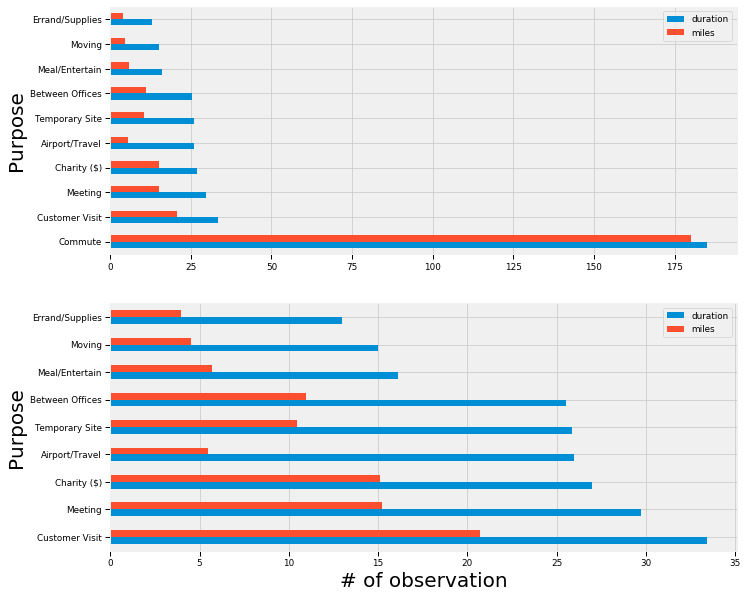

In [15]:
sns.set_context('paper')
fig, ax = plt.subplots(2, 1, figsize=(10,10))
purpose_uber.plot(kind='barh',ax=ax[0])
purpose_uber[1:].plot(kind='barh',ax=ax[1])
ax[1].set_xlabel('# of observation',size=20)
ax[0].set_ylabel('Purpose',size=20)
#ax[0].set_title('')
ax[1].set_ylabel('Purpose',size=20)
plt.show()

**Conclusion:** The bar graph represents a brief view for the **purposes** and **commute** being an outlier as it has only one observation for a high duration. The most common prupose for the ride is **customer visit** followed by **meeting** based upon features like **duration** and **miles**.

2. The count plot shows the number of rides taken on each day of the week.

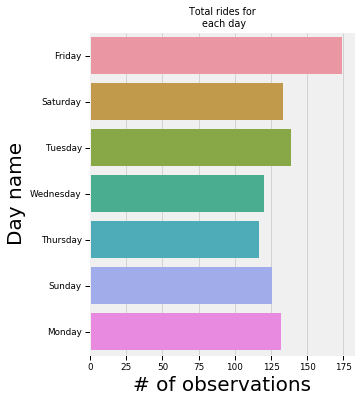

In [60]:
sns.catplot(y='day_name',data=uber,
            kind='count')
plt.ylabel('Day name',size=20)
plt.xlabel('# of observations',size=20)
plt.title('Total rides for\n each day')
plt.show()

**Conclusion:** The day on which the maximum rides were taken is **Friday**

3. The scatter plot shows the relation between **miles** and **duration**.

In [17]:
plt.figure(figsize=(8,6))
sns.relplot(x='miles',y='duration',
            data=uber,
           kind='scatter',
            hue='day_name')
plt.xlim(0,50)
plt.ylabel('Duration',size=20)
plt.xlabel('Miles',size=20)
plt.title('Miles vs Duration')

plt.show()

<Figure size 576x432 with 0 Axes>

**Conclusion:** Most of the rides are in between **0-25 miles**.

4. The count plot shows the frequency for **purpose** category.

In [18]:
sns.countplot(y='purpose',data=uber)
plt.title('Travel purposes')
plt.ylabel('Purposes')
plt.xlabel('# of observations')
plt.show()

**Conclusion:** **Meeting** is the most frequent purpose in the dataset.

5. The graph depicts the number of observations for **purpose** category filtered with **duration** and **miles**.

In [19]:
sns.countplot(y='purpose',data=uber,
             hue='category')
plt.title('Travel purposes by category')
plt.ylabel('Purposes')
plt.xlabel('# of observations')
plt.show()

**Conclusion:** The above figure shows that the most preferable **purpose** by **category** is **Meal/Entertain**.

6. Count plot for **category** feature.

In [20]:
sns.catplot('category',data=uber,
            kind='count')
plt.xlabel('categories',size=15)
plt.show()

**Conclusion:** Business category is the most comman category out of 2.

7. Count plot for **month** feature.

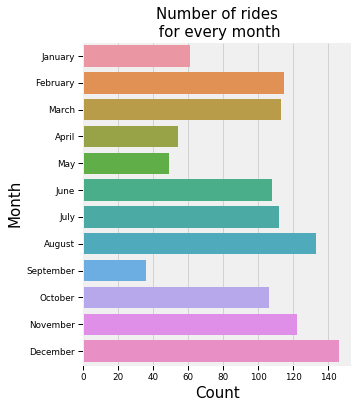

In [21]:
sns.catplot(y='month',data=uber,
           kind='count')
plt.title('Number of rides\n for every month',size=15)
plt.ylabel('Month',size=15)
plt.xlabel('Count',size=15)
plt.show()

**Conclusion:** The maximum number of rides were taken in the month of **December**.

8. Duration of rides for every month according to **Bussiness** and **Personal** category.

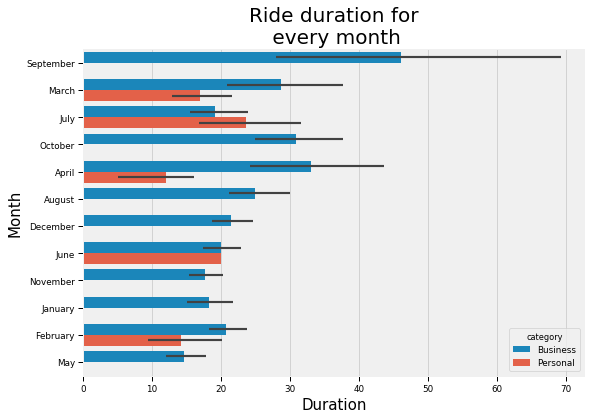

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(y='month',x='duration',
            data=uber.drop(uber[uber['purpose']=='Commute'].index).sort_values(by='duration',ascending=False),
            hue='category')
plt.title('Ride duration for\n every month',size=20)
plt.ylabel('Month',size=15)
plt.xlabel('Duration',size=15)
plt.show()

**Conclusion:** 
The duration for rides in september highly varies around the mean duration.

9. Exploring the distribution for the **month** feature according to **duration**.

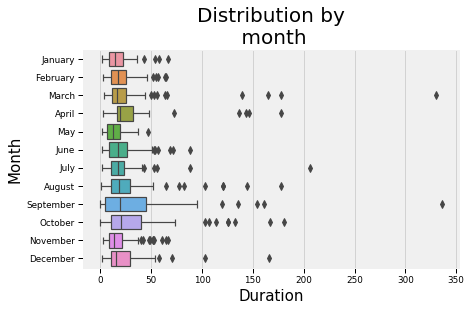

In [23]:
sns.boxplot(y='month',x='duration',
           data=uber.drop(uber[uber['purpose']=='Commute'].index))
plt.title('Distribution by\n month',size=20)
plt.ylabel('Month',size=15)
plt.xlabel('Duration',size=15)
plt.show()

**Conclusion:** 
1. The data does not show any significant variation in the context of duration except the month of september.
2. There are many outliers i.e some rides are exceptionally of longer duration.

10. Exploring the distribution for the **day** feature according to **duration**.

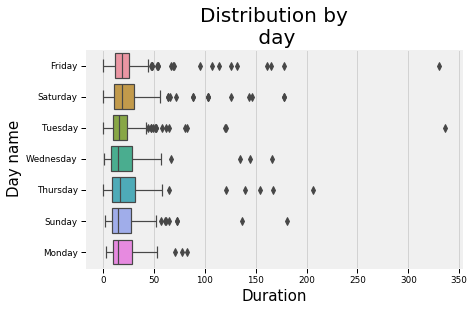

In [24]:
sns.boxplot(y='day_name',x='duration',data=uber.drop(uber[uber['purpose']=='Commute'].index))
plt.title('Distribution by\n day',size=20)
plt.ylabel('Day name',size=15)
plt.xlabel('Duration',size=15)
plt.show()

**Conclusion:** 
1. The data does not show any significant variation in rides for the days in the context of duration.
2. There are many outliers i.e some rides are exceptionally of longer duration.

# Word Clouds <a id="4"></a>

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.<br>

`Word` clouds are commonly used to perform high-level analysis and visualization of text data


1. Word cloud for **Purpose** feature.

In [25]:
from wordcloud import WordCloud, STOPWORDS
fig, ax = plt.subplots(figsize=(10,10))
purpose = uber['purpose'].tolist()
stopwords = set(STOPWORDS)
stopwords.add('nan')
word_cloud = WordCloud(
    background_color='black',
    random_state=123,
    stopwords=stopwords)
word_cloud.generate(str(purpose))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.show()

<Figure size 1008x1296 with 0 Axes>

**Conclusion:** The most common purposes for rides are the following:
* Meal/Entertain
* Meeting
* Customer Visit
* Errand Supplies

Dropping observations where **start_loc** and **stop_loc** is unknown

In [26]:
uber.drop(uber[uber['start_loc'] == 'Unknown Location']['start_loc'].index,inplace=True)
uber.drop(uber[uber['stop_loc'] == 'Unknown Location']['stop_loc'].index,inplace=True)

2. Word cloud for **start_loc** feature.

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
start_location = uber['start_loc'].tolist()
stopwords = set(STOPWORDS)
#stopwords.add('nan')
word_cloud = WordCloud(
    background_color='black',
    max_words=2000,
    random_state=122,
    stopwords=stopwords)
word_cloud.generate(str(start_location))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.show()

<Figure size 1440x1440 with 0 Axes>

**Conclusion** : The most favourable pick up locations are the following:
* Cary
* Whitebridge
* Morrisville

3. Word cloud for **stop_loc** feature.

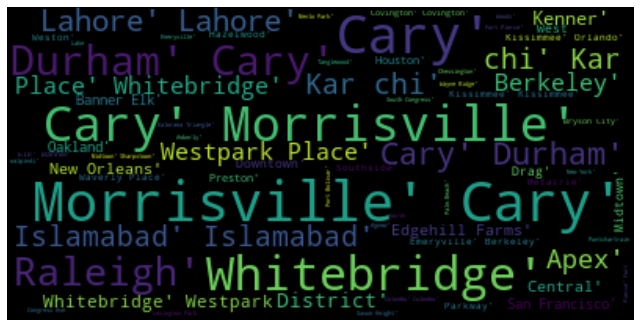

<Figure size 1008x1296 with 0 Axes>

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
stop_location = uber['stop_loc'].tolist()
stopwords = set(STOPWORDS)
#stopwords.add('nan')
word_cloud = WordCloud(
    background_color='black',
    random_state=123,
    stopwords=stopwords)
word_cloud.generate(str(stop_location))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.show()

**Conclusion** : The most favourable drop locations are the following:
* Cary
* Morrisville
* Whitebridge

# Preparing data for geocoding<a id="5"></a>

Cleaning the observations for **start_loc** and **stop_loc** to get proper name of places.

In [29]:
uber['stop_loc'].replace('Kar?chi','Karachi',inplace=True)
uber['start_loc'].replace('Kar?chi','Karachi',inplace=True)
uber['stop_loc'].replace('R?walpindi','Rawalpindi',inplace=True)
uber['start_loc'].replace('R?walpindi','Rawalpindi',inplace=True)

Dropping observations where **start_loc** and **stop_loc** is unknown

In [30]:
uber.drop(uber[uber['start_loc'] == 'Unknown Location']['start_loc'].index,inplace=True)
uber.drop(uber[uber['stop_loc'] == 'Unknown Location']['stop_loc'].index,inplace=True)

Accessing the wrong inputs for the **start_loc** and **stop_loc** feature.

In [31]:
#wrong_start = []
#wrong_stop = []
#for loc in uber['start_loc'].unique():
 #   location = Nominatim(user_agent = '43.225.2.137')
  #  codes = location.geocode(loc)
   # if not codes:
    #    wrong_start.append(loc)
#for loc in uber['stop_loc'].unique():
   # location = Nominatim(user_agent = '43.225.2.137')
    #codes = location.geocode(loc)
   # if not codes:
     #   wrong_stop.append(loc)
#print(wrong_start)
#print(wrong_stop)

In [32]:
uber.drop(uber[uber['start_loc'] == 'SOMISSPO'].index, inplace=True)
uber.drop(uber[uber['stop_loc'] == 'SOMISSPO'].index, inplace=True)

In [33]:
uber['start_loc'].replace('Savon Height','Savon Heights',inplace=True)
uber['stop_loc'].replace('Savon Height','Savon Heights',inplace=True)
uber['start_loc'].replace('Noorpur Shahan','Nurpur Shahan',inplace=True)
uber['stop_loc'].replace('Noorpur Shahan','Nurpur Shahan',inplace=True)
uber['start_loc'].replace('Townes at Everett Crossing','Everett Crossing',inplace=True)
uber['stop_loc'].replace('Townes at Everett Crossing','Everett Crossing',inplace=True)

Converting the location name to the respective latitude and longitude.

In [34]:
def geocoding(data):
    lat = []
    lng = []
    for loc in data:
        location = Nominatim(user_agent = '43.225.2.137')
        codes = location.geocode(loc)
        lat.append(codes.latitude)
        lng.append(codes.longitude)
    return (lat, lng)

In [35]:
#start_lat, start_lng = geocoding(uber['start_loc'])
#stop_lat, stop_lng = geocoding(uber['start_loc'])

In [36]:
uber_locations = pd.read_csv(r'Desktop\uber_locations.csv')
#uber_locations = pd.DataFrame({'start_loc':uber['start_loc'],
 #                          'start_lat':start_lat,
  #                         'start_lng':start_lng,
   #                        'stop_loc':uber['stop_loc'],
    #                       'stop_lat':stop_lat,
     #                      'stop_lng':stop_lng})
#uber_locations.to_csv(r'Desktop\uber_locations.csv',index=False)

In [37]:
uber_locations.head()

start_loc  start_lat  start_lng         stop_loc   stop_lat   stop_lng
0  Fort Pierce  27.446706 -80.325606      Fort Pierce  27.446706 -80.325606
1  Fort Pierce  27.446706 -80.325606      Fort Pierce  27.446706 -80.325606
2  Fort Pierce  27.446706 -80.325606      Fort Pierce  27.446706 -80.325606
3  Fort Pierce  27.446706 -80.325606      Fort Pierce  27.446706 -80.325606
4  Fort Pierce  27.446706 -80.325606  West Palm Beach  27.446706 -80.325606

In [38]:
uber_start = pd.DataFrame({'start_loc':uber_locations['start_loc'],
                          'latitude':uber_locations['start_lat'],
                          'longitude':uber_locations['start_lng']})
uber_stop = pd.DataFrame({'stop_loc':uber_locations['stop_loc'],
                          'latitude':uber_locations['stop_lat'],
                          'longitude':uber_locations['stop_lng']})

In [39]:
uber_start.head()

start_loc   latitude  longitude
0  Fort Pierce  27.446706 -80.325606
1  Fort Pierce  27.446706 -80.325606
2  Fort Pierce  27.446706 -80.325606
3  Fort Pierce  27.446706 -80.325606
4  Fort Pierce  27.446706 -80.325606

In [40]:
uber_stop.head()

stop_loc   latitude  longitude
0      Fort Pierce  27.446706 -80.325606
1      Fort Pierce  27.446706 -80.325606
2      Fort Pierce  27.446706 -80.325606
3      Fort Pierce  27.446706 -80.325606
4  West Palm Beach  27.446706 -80.325606

# Geo Maps<a id="6"></a>

In [41]:
fig, ax = plt.subplots(1,2,sharey=True)
ax[0].scatter('start_lng','start_lat',
              data=uber_locations,
             c='purple',
              marker='D',
             alpha=0.7,
             edgecolor = 'k')
ax[1].scatter('stop_lng','stop_lat',data=uber_locations,
             c='orange',
              marker='*',
             alpha=0.7,
             edgecolor = 'k')
ax[0].set_title('Start Locations',size=20)
ax[1].set_title('Stop Locations',size=20)
ax[0].set_xlabel('Longitude',size=20)
ax[1].set_xlabel('Longitude',size=20)
ax[0].set_ylabel('Latitude',size=20)
#ax[1].set_ylabel('Latitude',size=20)
plt.show()

In [42]:
import folium

Map showing pick up locations with **purpose**.

In [43]:
map_start_1 = folium.Map()
group_start_1 = folium.map.FeatureGroup()

for lat, lng, in zip(uber_start['latitude'],uber_start['longitude']):
    group_start_1.add_child(
        folium.CircleMarker( [lat, lng],
                            color='orange',
                            radius=5,
                            fill=True,
                            fill_color='green',
                            fill_opacity=0.7
        )
    )
    
latitudes = list(uber_start['latitude'])
longitudes = list(uber_start['longitude'])
labels = list(uber['purpose'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng],popup=label).add_to(map_start_1)

    
map_start_1.add_child(group_start_1)

In [44]:
from folium import plugins

Map showing pick up locations in the form of clusters to give a non-congested view of the data points.

In [45]:
map_start_2 = folium.Map()

group_start_2 = plugins.MarkerCluster().add_to(map_start_2)

for lat, lng, label in zip(uber_start['latitude'],uber_start['longitude'],uber['purpose']):
    folium.Marker(location = [lat, lng],
                 popup = label,
                 icon=None,
                 ).add_to(group_start_2)
    
map_start_2
#map_start_2.save('start_locations.html')

Map showing drop locations with **purpose**.

In [46]:
map_stop_1 = folium.Map()
group_stop_1 = folium.map.FeatureGroup()

for lat, lng, in zip(uber_stop['latitude'],uber_stop['longitude']):
    group_stop_1.add_child(
        folium.CircleMarker( [lat, lng],
                            color='orange',
                            radius=5,
                            fill=True,
                            fill_color='green',
                            fill_opacity=0.7
        )
    )
    
latitudes = list(uber_stop['latitude'])
longitudes = list(uber_stop['longitude'])
labels = list(uber['purpose'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng],popup=label).add_to(map_stop_1)

    
map_stop_1.add_child(group_stop_1)

Map showing drop locations in the form of clusters to give a non-congested view of the data points.

In [47]:
map_stop_2 = folium.Map()

group_stop_2 = plugins.MarkerCluster().add_to(map_stop_2)

for lat, lng, label in zip(uber_stop['latitude'],uber_stop['longitude'],uber['purpose']):
    folium.Marker(location = [lat, lng],
                 popup = label,
                 icon=None,
                 ).add_to(group_stop_2)
    
map_stop_2

# Time series data <a id="7"></a>

In [48]:
ts = uber.loc[:,['start_date','miles','duration']]
ts['speed'] = ts['miles'].div(ts['duration'])

In [49]:
ts.head()

start_date  miles  duration     speed
0 2016-01-01 21:11:00    5.1       6.0  0.850000
1 2016-01-02 01:25:00    5.0      12.0  0.416667
2 2016-01-02 20:25:00    4.8      13.0  0.369231
3 2016-01-05 17:31:00    4.7      14.0  0.335714
4 2016-01-06 14:42:00   63.7      67.0  0.950746

In [50]:
ts['date'] = ts['start_date'].dt.date
ts['date'] = pd.to_datetime(ts['date'])
ts.set_index('date',inplace=True)
ts.drop('start_date',axis=1,inplace=True)
ts.head()

miles  duration     speed
date                                 
2016-01-01    5.1       6.0  0.850000
2016-01-02    5.0      12.0  0.416667
2016-01-02    4.8      13.0  0.369231
2016-01-05    4.7      14.0  0.335714
2016-01-06   63.7      67.0  0.950746

# Average monthly data

In [51]:
import math
ts_monthly = ts[ts['speed']!=math.inf].resample('M').agg('mean')
ts_monthly.plot(subplots=True,title='Monthly average data')
plt.legend(loc='upper left')
plt.show()

# Average Quarterly data

In [52]:
ts_quaterly = ts[ts['speed']!=math.inf].resample('Q').agg('mean')
ts_quaterly.plot(subplots=True,title='Monthly rides')
plt.legend(loc='upper left')
plt.show()

In [53]:
ts_monthly

miles   duration     speed
date                                      
2016-01-31   8.408197  18.295082  0.430084
2016-02-29   6.596512  17.220930  0.363155
2016-03-31  14.990265  25.743363  0.391931
2016-04-30  20.611111  31.907407  0.497945
2016-05-31   7.424490  14.612245  0.596857
2016-06-30   7.828037  20.196262  0.408998
2016-07-31  10.933929  21.589286  0.417406
2016-08-31   5.401538  15.769231  0.327288
2016-09-30  16.800000  89.333333  0.156558
2016-10-31  17.281481  30.160494  0.425031
2016-11-30   6.816949  17.906780  0.336210
2016-12-31   4.705556  16.111111  0.288948

In [54]:
ts.rolling(12).mean().plot(figsize=(8,8),subplots=True);

In [55]:
(ts.sub(ts.rolling(12).mean())).plot(subplots=True,figsize=(8,8));

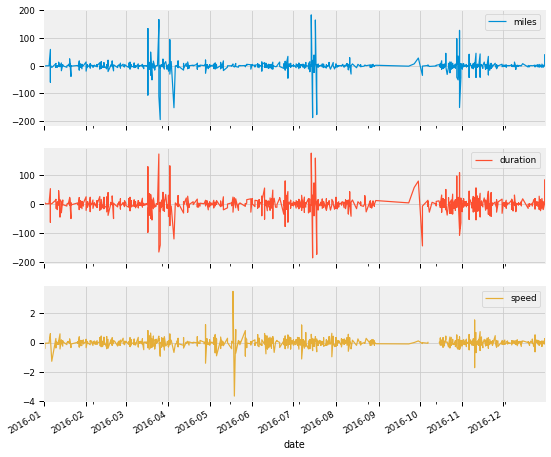

In [56]:
ts.diff().plot(subplots=True,figsize=(8,8));

# Final Takeouts<a id="8"></a>

* Average duration per day is **3835** mins.
* Average distance per day is **1744** miles.
* Average duration per week is **507** mins.
* Average distance per week is **230** miles.
* Average duration per month is **2237** mins.
* Average distance per month is **1017** miles.
* The day for maximum rides is **FRIDAY**.
* The month for maximum rides is **DECEMBER**. 
* The most common purpose is **MEETING**.